# 7주차 미니 과제 개요

SVM 과 그레디언트 부스팅 모델 테스트 해보기

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

데이터 세트 플로팅 함수

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Q1: 사이킷런 samples_generator 서브 패키지를 참고하여 도넛 모형의 비선형 분류 예제를 생성하자.

스펙
- 1000개 생성
- factor=0.1
- noise=0.1

In [ ]:
from sklearn.datasets.samples_generator import make_circles

# 코딩 영역

X, y = sklearn.datasets.make_circles(n_samples=1000, noise=0.1, factor=0.1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


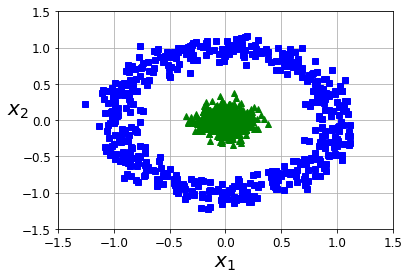

In [ ]:
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

SVM 결정경계 플로팅 함수

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, levels=[-1, 0, 1],  cmap=plt.cm.brg, alpha=0.1)

#Q2: SVC를 임포트 하고 선형 분류기 ``linear_clf`` 를 만들어보자

스펙
- kernel='linear'
- C=1e3

In [ ]:
from sklearn.svm import SVC

In [ ]:
# 코딩영역

linear_clf = sklearn.svm.SVC(C=1e3, kernel='linear')
linear_clf.fit(X, y)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

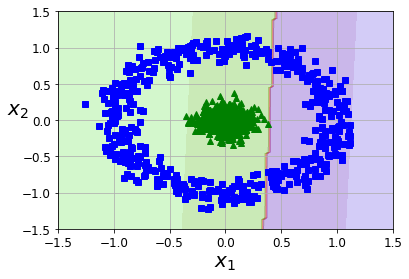

In [ ]:
plot_predictions(linear_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

# Q2a: C 값을 다양하게 설정해가며 결과를 관찰 및 정리해보자.

In [ ]:
linear_clf01 = sklearn.svm.SVC(C=0.1, kernel='linear')
linear_clf01.fit(X, y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

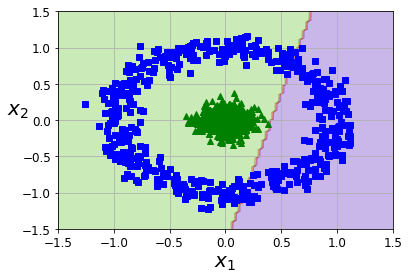

In [ ]:
plot_predictions(linear_clf01, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

In [ ]:
linear_clf02 = sklearn.svm.SVC(C=10, kernel='linear')
linear_clf02.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

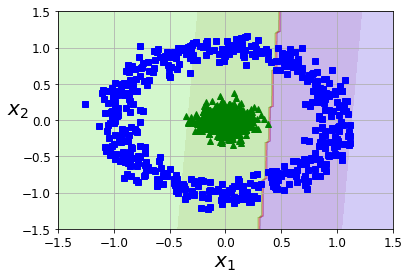

In [ ]:
plot_predictions(linear_clf02, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

C의 값이 낮을 때, 경계의 기울기가 더 작다. 그리고 특정 C의 값 부터 경계의 기울기의 변화가 없다.

---------------

#Q3: RBF 커널을 사용하는 svm 분류기 `rbf_clf`를  학습해보자

스펙
- kernel='rbf'
- C=1e6

In [ ]:
# 코딩 영역

rbf_clf = sklearn.svm.SVC(C=1e6, kernel='rbf')
rbf_clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

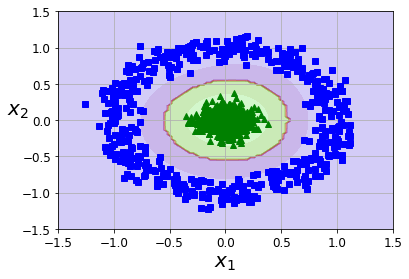

In [ ]:
plot_predictions(rbf_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

#Q4: ``plot_predictions``를 수정하여 ``plot_predictions_with_sv`` 함수를 작성하자.

스펙
- 서포트 벡터를 찍어 보자.

In [ ]:
# 코딩 영역

def plot_predictions_with_sv(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, levels=[-1, 0, 1],  cmap=plt.cm.brg, alpha=0.1)
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

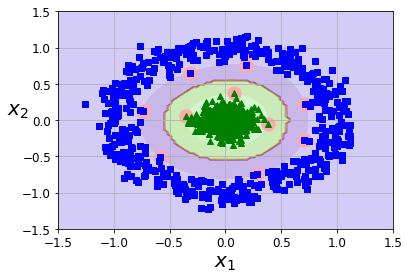

In [ ]:
plot_predictions_with_sv(rbf_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

#Q4a: 하이퍼파라미터를 달리해가며 결과를 관찰해보자.

1.0
{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


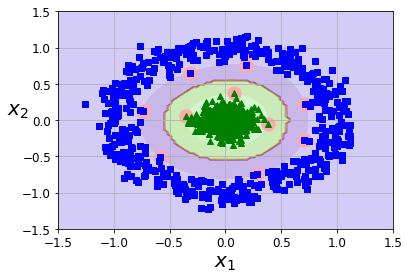

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [
          {'kernel' : ['rbf'], 'C':[1.0, 3.0, 10., 30., 100., 300., 1e4, 1e5, 1e6], 'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

gs = GridSearchCV(estimator=sklearn.svm.SVC(), param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

plot_predictions_with_sv(rbf_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

---------------

lightgbm 인스톨

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

#Q5: 그레디언트 부스팅 모델 lightgbm 학습기 ``gbm_clf`` 를 만들고 결정 경계를 그려보자

스펙
- max_depth=2

In [ ]:
# 코딩 영역
import lightgbm

gbm_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=42, verbose=1)
gbm_clf.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=1)

In [ ]:
def plot_predictions_gbm(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

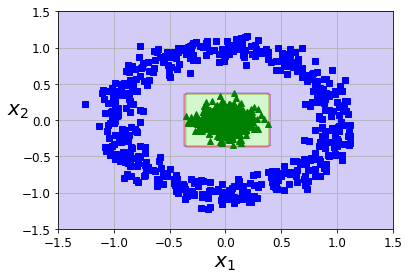

In [ ]:
plot_predictions_gbm(gbm_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

#Q5a: 하이퍼퍼라미터를 달라해가면 결과를 관찰해 보자.

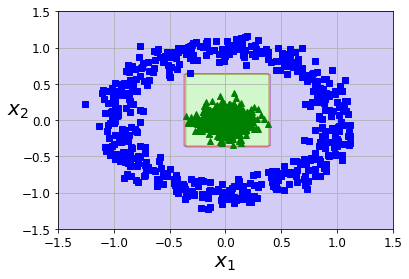

In [ ]:
gbm_clf01 = lightgbm.LGBMClassifier(max_depth=5, random_state=42)
gbm_clf01.fit(X, y)
plot_predictions_gbm(gbm_clf01, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

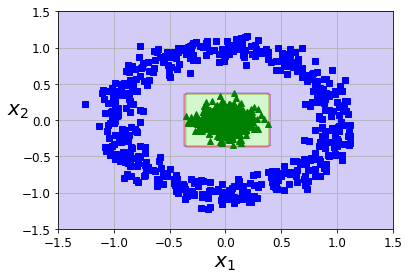

In [ ]:
gbm_clf01 = lightgbm.LGBMClassifier(num_leaves=10, max_depth=2, random_state=42)
gbm_clf01.fit(X, y)
plot_predictions_gbm(gbm_clf01, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

max_depth를 5로 수정하니 경계변화가 있었으며, num_leaves를 10으로 수정하면 경계변화가 없었다.

# Q5b: 랜덤포레스트 모델로도 학습, 결정 경계를 그려보자

스펙
- 몇가지 하이퍼파라미터를 달리해가며 경향을 파악해보자.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.metrics import accuracy_score

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    1.6s finished


0.9626299999999999

In [ ]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [ ]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

1.0